Урок 7. Многомерный статистический анализ. Линейная регрессия

1. Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks): zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110], ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]. Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату (то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая переменная). Произвести расчет как с использованием intercept, так и без.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

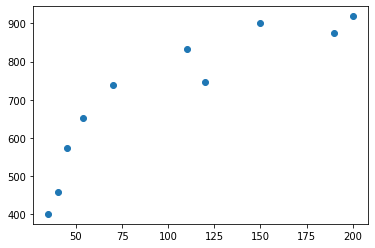

In [3]:
plt.scatter(zp, ks)

Не очень то оно линейно зависит, но все же. Считаем коэффициенты b для линейной регрессии

In [4]:
b = (np.mean(zp * ks) - np.mean(zp) * np.mean(ks))/(np.mean(zp**2) - np.mean(zp)**2)
b

2.620538882402765

Это без интерсепта. Посмотрим, что получится по значениям:

In [5]:
ks_hat = b * zp
ks_hat

array([ 91.71886088, 117.92424971, 497.90238766, 524.10777648,
       104.8215553 , 183.43772177, 141.50909965, 393.08083236,
       314.46466589, 288.25927706])

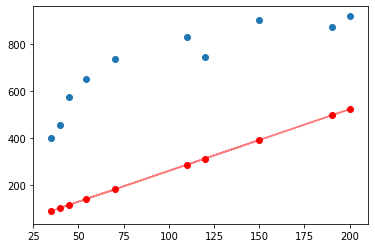

In [18]:
plt.scatter(zp, ks)
plt.plot(zp, b * zp, color='red', alpha=0.5)
plt.scatter(zp, ks_hat, color='red')

Довольно сильно отличается. Попробуем вторым способом:

In [12]:
n = zp.size
b = (n * (np.sum(zp * ks)) - (np.sum(zp) * np.sum(ks)))/(n * (np.sum(zp**2)) - ((np.sum(zp)**2)))
b

2.6205388824027653

Практически то-же самое..

Теперь с интерсептом

In [14]:
a = np.mean(ks)- b * np.mean(zp)
a

444.17735732435955

In [37]:
ks_hat2 = a + b * zp
ks_hat2

array([535.89621821, 562.10160703, 942.07974498, 968.2851338 ,
       548.99891262, 627.61507909, 585.68645697, 837.25818968,
       758.64202321, 732.43663439])

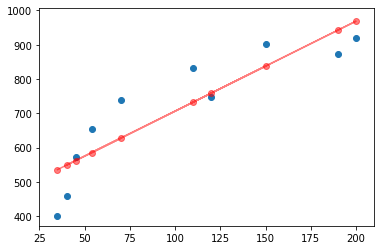

In [38]:
plt.scatter(zp, ks)
plt.plot(zp, ks_hat2, color='red', alpha=0.5)
plt.scatter(zp, ks_hat2, color='red', alpha=0.5)

Так слегка лучше )

In [44]:
mse = ((ks - ks_hat2)**2).sum()/n
mse

6470.414201176658

Это нормально вообще? Такое значение mse.. )

2. Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept).

In [55]:
# Определяем функцию расчета ошибки mse
def mse(B1, B0=0, y=ks, X=zp, n=10):
    return np.sum(((B0 + B1 * X) - y)**2)/n

In [56]:
mse(b, a)

6470.414201176658

Работает )

In [70]:
alpha = 1e-7
B1 = 0.0

In [71]:
# Начинаем подбирать:
for i in range(10000):
    B1 -= alpha * (2/n) * np.sum((B1*zp - ks) * zp)
    if i%100 == 0:
        print('i: {i}, B1: {B1}, mse: {mse_}'.format(i=i, B1=B1, mse_=mse(B1)))


i: 0, B1: 0.01622834, mse: 531796.9380003073
i: 100, B1: 1.4324718544314756, mse: 330229.74429878284
i: 200, B1: 2.507230011213821, mse: 214147.58420569272
i: 300, B1: 3.3228419337396424, mse: 147296.090942204
i: 400, B1: 3.941793094024705, mse: 108796.44424391426
i: 500, B1: 4.411502435241568, mse: 86624.57158205632
i: 600, B1: 4.76795522082932, mse: 73855.8326586551
i: 700, B1: 5.038459929175337, mse: 66502.3404128486
i: 800, B1: 5.243740404447008, mse: 62267.47833809542
i: 900, B1: 5.399523546949131, mse: 59828.62939494055
i: 1000, B1: 5.517744178773556, mse: 58424.10096815019
i: 1100, B1: 5.607459391629637, mse: 57615.2357421184
i: 1200, B1: 5.675542426659986, mse: 57149.411810467114
i: 1300, B1: 5.727209245601596, mse: 56881.14470203475
i: 1400, B1: 5.766418134840383, mse: 56726.65018902946
i: 1500, B1: 5.796172956732489, mse: 56637.67709542804
i: 1600, B1: 5.818753280812552, mse: 56586.437661541255
i: 1700, B1: 5.835889025647774, mse: 56556.928969882116
i: 1800, B1: 5.84889299095

In [74]:
mse(5.889820420124631)

56516.8584157194

Получился B1 = 5.889820420124631

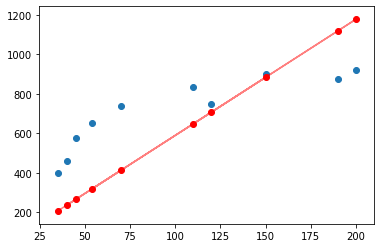

In [75]:
plt.scatter(zp, ks)
plt.plot(zp, B1 * zp, color='red', alpha=0.5)
plt.scatter(zp, B1 * zp, color='red')